<a href="https://colab.research.google.com/github/Meshal-Css/Aramco-Challenge/blob/main/PV_model_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

library basic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
import json
import plotly.express as px
import pandas as pd
from ipywidgets import interact

dataframe

In [ ]:


# إحداثيات مطار الملك خالد
latitude = 24.9584
longitude = 46.6989

# البارامترات المطلوبة
parameters = [
    "ALLSKY_SFC_SW_DWN", "CLRSKY_SFC_SW_DWN", "CLOUD_AMT",
    "WS10M", "WD10M", "PRECTOT", "TS", "ALLSKY_SFC_LW_DWN",
    "ALLSKY_SFC_UV_INDEX", "RH2M", "GWETTOP"
]

# المدة الزمنية
end_date = datetime.now().strftime("%Y%m%d")
start_date = (datetime.now() - timedelta(days=365)).strftime("%Y%m%d")

# رابط API
url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters={','.join(parameters)}&latitude={latitude}&longitude={longitude}&start={start_date}&end={end_date}&community=AG&format=JSON"

# جلب البيانات
response = requests.get(url)

if response.status_code == 200:
    data = response.json()


    df_nasa = pd.DataFrame(data["properties"]["parameter"])


    df_nasa = pd.DataFrame({param: pd.Series(values) for param, values in data["properties"]["parameter"].items()})


    df_nasa.index = pd.to_datetime(df_nasa.index, format='%Y%m%d')
    df_nasa.index.name = "Date"

    print("✅ بيانات NASA جاهزة:")
    print(df_nasa.head())


    df_nasa.to_csv("nasa_data.csv")
else:
    print(f"❌ Error: {response.text}")


✅ بيانات NASA جاهزة:
            WD10M  WS10M  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_LW_DWN  CLOUD_AMT  \
Date                                                                        
2024-08-12   40.2   2.91              25.58              34.93       6.30   
2024-08-13   46.5   3.78              25.97              34.70       4.39   
2024-08-14   64.6   4.24              25.14              35.31       2.67   
2024-08-15   66.4   2.99              25.41              35.30      14.77   
2024-08-16    5.3   3.75              25.95              34.77       2.72   

             RH2M  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_UV_INDEX     TS  GWETTOP  \
Date                                                                        
2024-08-12  15.46              25.64                 2.37  36.18     0.06   
2024-08-13  13.65              26.02                 2.38  38.31     0.06   
2024-08-14  16.78              25.16                 2.20  38.85     0.06   
2024-08-15  16.91              25.49                 2

In [ ]:
data = pd.read_csv("/content/nasa_data.csv")
data.sample(30)

,Date,WD10M,WS10M,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,CLOUD_AMT,RH2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_UV_INDEX,TS,GWETTOP,PRECTOTCORR
243,2025-04-12,331.5,5.29,26.64,31.68,18.99,27.76,26.74,2.49,29.79,0.20,0.0
98,2024-11-18,190.9,3.00,16.66,28.92,4.08,29.30,16.73,1.06,23.57,0.09,0.0
321,2025-06-29,290.4,5.69,27.03,35.20,-999.00,10.45,-999.00,-999.00,36.85,0.06,0.0
116,2024-12-06,185.3,2.93,15.13,28.60,7.42,39.57,15.34,0.99,21.24,0.19,0.0
292,2025-05-31,38.0,4.36,28.21,31.06,-999.00,11.77,28.91,-999.00,34.65,0.09,0.0
94,2024-11-14,54.5,3.07,17.44,27.70,2.24,41.39,17.46,1.23,21.53,0.09,0.0
203,2025-03-03,84.9,3.56,23.86,23.49,21.83,26.14,23.97,1.49,13.17,0.26,0.0
231,2025-03-31,172.6,4.73,22.66,31.71,49.16,25.47,25.31,1.93,26.13,0.29,0.0
137,2024-12-27,167.7,7.07,14.25,27.62,10.20,42.27,14.85,0.90,17.55,0.14,0.0
114,2024-12-04,172.0,4.86,14.83,27.64,6.40,36.85,15.06,0.98,17.92,0.20,0.0


In [ ]:
data.columns

Index(['Date', 'WD10M', 'WS10M', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN',
       'CLOUD_AMT', 'RH2M', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_UV_INDEX', 'TS',
       'GWETTOP', 'PRECTOTCORR'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 366 non-null    object 
 1   WD10M                366 non-null    float64
 2   WS10M                366 non-null    float64
 3   ALLSKY_SFC_SW_DWN    366 non-null    float64
 4   ALLSKY_SFC_LW_DWN    366 non-null    float64
 5   CLOUD_AMT            366 non-null    float64
 6   RH2M                 366 non-null    float64
 7   CLRSKY_SFC_SW_DWN    366 non-null    float64
 8   ALLSKY_SFC_UV_INDEX  366 non-null    float64
 9   TS                   366 non-null    float64
 10  GWETTOP              366 non-null    float64
 11  PRECTOTCORR          366 non-null    float64
dtypes: float64(11), object(1)
memory usage: 34.4+ KB


In [ ]:
data.columns

Index(['Date', 'WD10M', 'WS10M', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN',
       'CLOUD_AMT', 'RH2M', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_UV_INDEX', 'TS',
       'GWETTOP', 'PRECTOTCORR'],
      dtype='object')

EDA

In [ ]:
metadata = {
    "dataset_info": {
        "name": "nasa_ksia_weather_data",
        "time_range": "2023 (366 يومًا)",
        "location": {
            "name": "King Khalid International Airport",
            "coordinates": {"latitude": 24.9584, "longitude": 46.6989}
        },
        "data_quality": {
            "complete": True,
            "missing_values": 0
        }
    },
    "columns": [
        {
            "name": "Date",
            "type": "object",
            "description": "تاريخ القياس (يفضل تحويله إلى DateTime)",
            "unit": "YYYY-MM-DD"
        },
        {
            "name": "WD10M",
            "type": "float64",
            "description": "اتجاه الرياح عند 10 أمتار",
            "unit": "درجة (0-360)"
        },
        {
            "name": "RH2M",
            "type": "float64",
            "description": "الرطوبة النسبية عند 2 متر",
            "unit": "%"
        },
        {
            "name": "WS10M",
            "type": "float64",
            "description": "سرعة الرياح عند 10 أمتار",
            "unit": "m/s"
        },
        {
            "name": "ALLSKY_SFC_SW_DWN",
            "type": "float64",
            "description": "الإشعاع الشمسي الكلي على السطح",
            "unit": "W/m²"
        },
        {
            "name": "CLOUD_AMT",
            "type": "float64",
            "description": "نسبة الغطاء السحابي",
            "unit": "% (0-100)"
        },
        {
            "name": "CLRSKY_SFC_SW_DWN",
            "type": "float64",
            "description": "الإشعاع الشمسي في السماء الصافية",
            "unit": "W/m²"
        },
        {
            "name": "ALLSKY_SFC_UV_INDEX",
            "type": "float64",
            "description": "مؤشر الأشعة فوق البنفسجية",
            "unit": "0-11+"
        },
        {
            "name": "TS",
            "type": "float64",
            "description": "درجة حرارة سطح الأرض",
            "unit": "°C"
        },
        {
            "name": "ALLSKY_SFC_LW_DWN",
            "type": "float64",
            "description": "الإشعاع الحراري الطويل الساقط",
            "unit": "W/m²"
        },
        {
            "name": "GWETTOP",
            "type": "float64",
            "description": "رطوبة التربة السطحية (0-5 سم)",
            "unit": "% (0-100)"
        },
        {
            "name": "PRECTOTCORR",
            "type": "float64",
            "description": "هطول الأمطار اليومي المصحح",
            "unit": "mm/day"
        }
    ],
    "notes": "يحتوي هذا الملف على بيانات يومية لمدة عام واحد (366 يومًا) بدون قيم مفقودة."
}


with open('nasa_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(metadata, f, ensure_ascii=False, indent=4)

print("تم الحفظ'nasa_metadata.json'")

تم الحفظ'nasa_metadata.json'


anlysis for nasa data

In [ ]:
nasa_data = pd.read_csv('/content/nasa_data.csv')
nasa_data['Date'] = pd.to_datetime(nasa_data['Date'])
nasa_data.set_index('Date', inplace=True)

In [ ]:
nasa_data

,WD10M,WS10M,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,CLOUD_AMT,RH2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_UV_INDEX,TS,GWETTOP,PRECTOTCORR
Date,,,,,,,,,,,
2024-08-12,40.2,2.91,25.58,34.93,6.30,15.46,25.64,2.37,36.18,0.06,0.00
2024-08-13,46.5,3.78,25.97,34.70,4.39,13.65,26.02,2.38,38.31,0.06,0.00
2024-08-14,64.6,4.24,25.14,35.31,2.67,16.78,25.16,2.20,38.85,0.06,0.00
2024-08-15,66.4,2.99,25.41,35.30,14.77,16.91,25.49,2.26,39.30,0.06,0.00
2024-08-16,5.3,3.75,25.95,34.77,2.72,14.80,25.99,2.37,39.13,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-08,78.0,1.90,-999.00,-999.00,-999.00,17.04,-999.00,-999.00,41.08,0.01,0.03
2025-08-09,56.1,3.00,-999.00,-999.00,-999.00,17.04,-999.00,-999.00,41.20,0.02,0.03
2025-08-10,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [ ]:
nasa_data['Efficiency_Loss'] = 1 - (nasa_data['ALLSKY_SFC_SW_DWN'] / nasa_data['CLRSKY_SFC_SW_DWN'])

In [ ]:
nasa_data['High_Dust_Risk'] = (nasa_data['Efficiency_Loss'] > 0.1).astype(int)  # افتراضيًا: فقدان كفاءة > 10%

In [ ]:
nasa_data.describe()

,WD10M,WS10M,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,CLOUD_AMT,RH2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_UV_INDEX,TS,GWETTOP,PRECTOTCORR,Efficiency_Loss,High_Dust_Risk
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,129.329235,-4.207077,7.625055,16.583798,-184.533415,18.113934,-33.428415,-200.714754,18.586721,-8.051284,-7.993087,0.092128,0.204918
std,154.521509,90.566651,118.749249,119.735758,411.174599,93.820524,232.507965,402.417615,93.106439,90.209629,90.222038,0.217412,0.404194
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,37.925000,3.092500,16.920000,28.465000,2.087500,13.905000,17.315000,0.880000,17.905000,0.050000,0.000000,0.002857,0.000000
50%,115.350000,3.945000,22.505000,31.255000,4.990000,22.245000,22.525000,1.220000,29.150000,0.090000,0.000000,0.013666,0.000000
75%,185.225000,4.782500,26.557500,33.120000,24.297500,36.842500,26.537500,1.980000,35.507500,0.210000,0.000000,0.056388,0.000000
max,360.000000,7.530000,28.890000,37.060000,99.630000,78.270000,29.420000,2.630000,41.200000,0.490000,12.600000,1.028228,1.000000


In [ ]:
nasa_data.columns

Index(['WD10M', 'WS10M', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT',
       'RH2M', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_UV_INDEX', 'TS', 'GWETTOP',
       'PRECTOTCORR', 'Efficiency_Loss', 'High_Dust_Risk'],
      dtype='object')

/tmp/ipython-input-2209184549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='High_Dust_Risk',
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


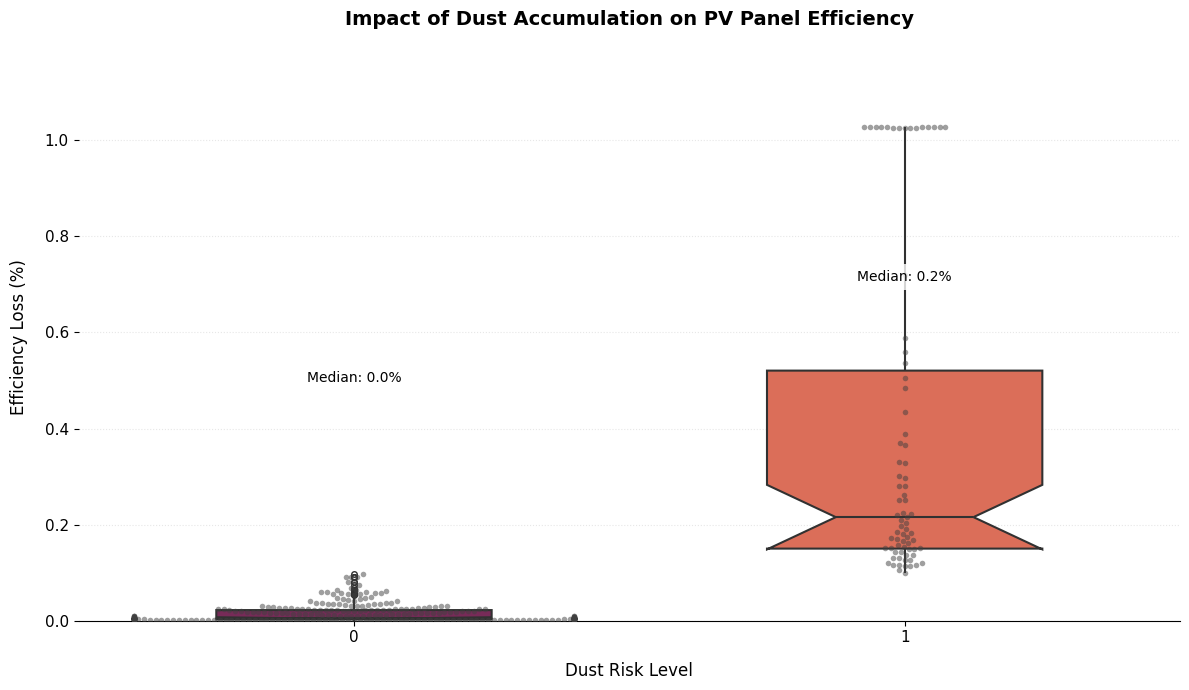

In [ ]:
plt.figure(figsize=(12, 7))


box = sns.boxplot(x='High_Dust_Risk',
                 y='Efficiency_Loss',
                 data=nasa_data,
                 palette="rocket",
                 width=0.5,
                 linewidth=1.5,
                 fliersize=4,            # Outlier dot size
                 notch=True,
                 showcaps=False)


sns.swarmplot(x='High_Dust_Risk',
             y='Efficiency_Loss',
             data=nasa_data,
             color=".25",
             size=4,
             alpha=0.5)


plt.title('Impact of Dust Accumulation on PV Panel Efficiency',
         fontsize=14,
         pad=20,
         fontweight='bold')

plt.xlabel('Dust Risk Level',
          fontsize=12,
          labelpad=12)
plt.ylabel('Efficiency Loss (%)',
          fontsize=12,
          labelpad=12)


plt.grid(axis='y',
        linestyle=':',
        alpha=0.3)
plt.ylim(0, nasa_data['Efficiency_Loss'].max()*1.15)


medians = nasa_data.groupby('High_Dust_Risk')['Efficiency_Loss'].median()
for i, median in enumerate(medians):
    plt.text(i, median+0.5,
            f'Median: {median:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))


sns.despine(left=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

In [ ]:
nasa_data['Efficiency_Loss'] = (1 - (nasa_data['ALLSKY_SFC_SW_DWN'] / nasa_data['CLRSKY_SFC_SW_DWN'])) * 100
nasa_data['Efficiency_Loss'] = nasa_data['Efficiency_Loss'].clip(0, 100)  # تقييم بين 0 و100%

# High_Dust_Risk (عتبة 10%)
nasa_data['High_Dust_Risk'] = (nasa_data['Efficiency_Loss'] > 10).astype(int)

/tmp/ipython-input-1099445166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


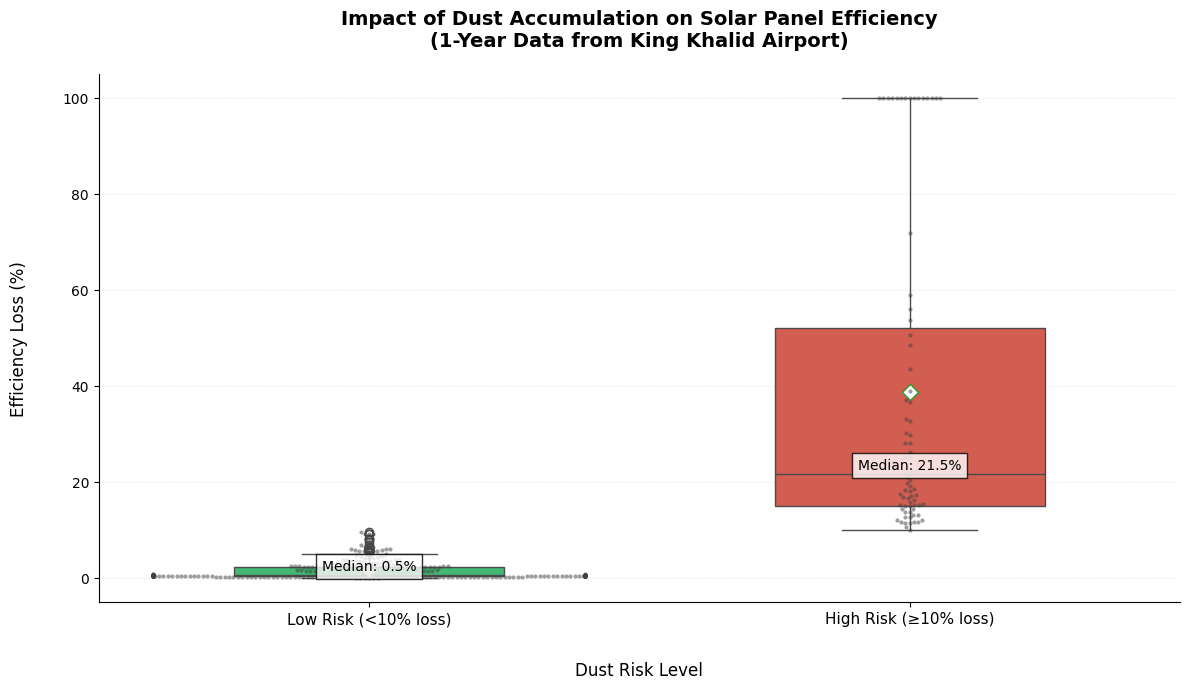

In [ ]:

clean_data = nasa_data[
    (nasa_data['Efficiency_Loss'] >= 0) &
    (nasa_data['Efficiency_Loss'] <= 100) &
    (nasa_data['High_Dust_Risk'].isin([0, 1]))
]

# Create figure
plt.figure(figsize=(12, 7))


sns.boxplot(
    x='High_Dust_Risk',
    y='Efficiency_Loss',
    data=clean_data,
    palette=["#2ecc71", "#e74c3c"],
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"white", "markersize":"8"}
)


sns.swarmplot(
    x='High_Dust_Risk',
    y='Efficiency_Loss',
    data=clean_data,
    color=".25",
    size=3,
    alpha=0.5
)


plt.title('Impact of Dust Accumulation on Solar Panel Efficiency\n(1-Year Data from King Khalid Airport)',
         fontsize=14,
         pad=20,
         fontweight='bold')

plt.xlabel('\nDust Risk Level',
          fontsize=12,
          labelpad=10)
plt.ylabel('Efficiency Loss (%)\n',
          fontsize=12,
          labelpad=10)


plt.xticks([0, 1],
           ['Low Risk (<10% loss)', 'High Risk (≥10% loss)'],
           fontsize=11)


medians = clean_data.groupby('High_Dust_Risk')['Efficiency_Loss'].median()
for xtick in [0, 1]:
    plt.text(xtick, medians[xtick]+1,
            f'Median: {medians[xtick]:.1f}%',
            horizontalalignment='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))


sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.tight_layout()

plt.show()